In [ ]:
%load_ext memory_profiler

###################################################################################

######################
#import useful modules
######################
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from matplotlib.offsetbox import AnchoredText

from Modules import *


In [2]:
###################################################################################
# Load simul [zoom over the eurec4a region]
###################################################################################

simulname = 'gigatl3_1h_tides'; time = 10080

simulname = 'gigatl3_1h_tides_avg'; time = 574

%memit simul = load(simul = simulname + ' [2000,2800,600,1300,[1,100,1]] ' + format(time), light=False, output=True)
#simul = load('gigatl6_1h',time=2000)


simulname is None
args (['gigatl3_1h_tides_avg', '[2000,2800,600,1300,[1,100,1]]', '574'],)
args[0] ['gigatl3_1h_tides_avg', '[2000,2800,600,1300,[1,100,1]]', '574']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h_tides/GIGATL3_5d_aver_2011-11-24-2011-11-28.nc
get domain [2000,2800,600,1300,[1,100,1]] [2000
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h_tides/GIGATL3_5d_aver_2011-11-24-2011-11-28.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h_tides/GIGATL3_5d_aver_2011-11-24-2011-11-28.nc
[2000, 2800, 600, 1300, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25

In [3]:
# Define horizontal coordinates (deg, km, or grid points)
##############

coord = 'points'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'

##############


In [9]:
y_sections = [2200]


depth = 0 # at the surface

#################################################

# Load salinity
%memit sss = var('salt',simul,depths=[depth]).data*simul.mask

# Compute relative vorticity (and normalize by f)
%memit vrt = var('vrt',simul,depths=[depth]).data/tools.rho2psi(simul.f)*tools.rho2psi(simul.mask)

peak memory: 456.98 MiB, increment: 0.01 MiB
depths [0] 0 vrt
computing vrt
depths [0] 0 vrt
computing vrt
depths [0] 0 vrt
computing vrt
depths [0] 0 vrt
computing vrt
peak memory: 767.80 MiB, increment: 310.82 MiB


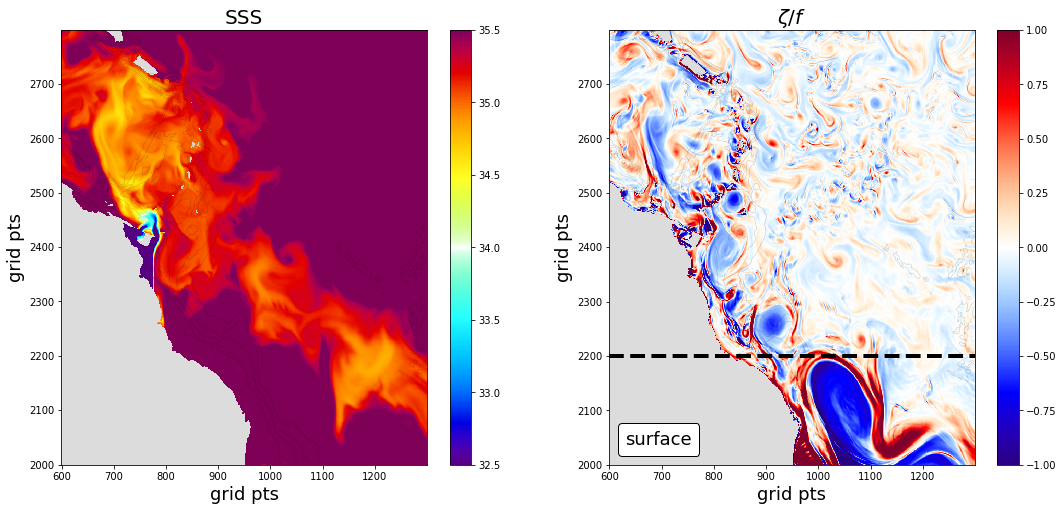

In [10]:
#################################################
# Plot horizontal sections of salinity and vorticity
#################################################

fig = plt.figure(figsize=(18.0,8.0)) 

##################

ax1 = fig.add_subplot(121,facecolor='Gainsboro')

plt.pcolormesh(lon,lat,ma.masked_invalid(sss),\
               cmap = plot.ncview_colormap('jaisnc'),vmin=32.5,vmax=35.5,shading='auto');

plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title('SSS', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])

#################################################

ax2 = fig.add_subplot(122,facecolor='Gainsboro')

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.,shading='auto');
plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])

### add lines to show vertical sections
for y_sec in y_sections:
    iy = y_sec - simul.coord[0]
    plt.plot(lon[:,iy],lat[:,iy],'--k',linewidth=4)

### add depth on plot
if depth==0:    
    at = AnchoredText('surface',loc=3, prop=dict(size=18), frameon=True, )
else:
    at = AnchoredText(r'$z =$'+format(depth)+ ' m',loc=3, prop=dict(size=18), frameon=True, )

at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)


### save the figure
plt.savefig('eurec4a_horiz_section_' + '{0:04}'.format(-depth) +  '.png', bbox_inches='tight', transparent='true', dpi=200)

peak memory: 936.09 MiB, increment: 539.60 MiB
depths [-300] -300 vrt
depths [-300] -300 vrt
depths [-300] -300 vrt
depths [-300] -300 vrt
peak memory: 2169.82 MiB, increment: 1773.25 MiB


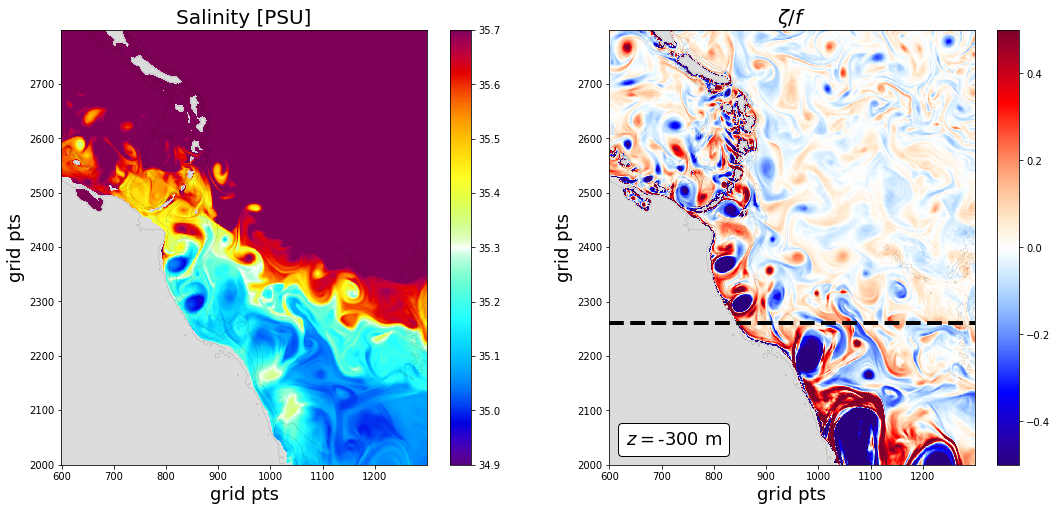

In [8]:
depth = -300 # at the surface


#################################################

# Load salinity
%memit s_depth = var('salt',simul,depths=[depth]).data*simul.mask

# Compute relative vorticity (and normalize by f)
%memit vrt_depth = var('vrt',simul,depths=[depth]).data/tools.rho2psi(simul.f)*tools.rho2psi(simul.mask)



#################################################
# Plot horizontal sections of salinity and vorticity
#################################################

fig = plt.figure(figsize=(18.0,8.0)) 

##################

ax1 = fig.add_subplot(121,facecolor='Gainsboro')

plt.pcolormesh(lon,lat,ma.masked_invalid(s_depth),\
               cmap = plot.ncview_colormap('jaisnc'),vmin=34.9,vmax=35.7,shading='auto');

plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title('Salinity [PSU]', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])

#################################################

ax2 = fig.add_subplot(122,facecolor='Gainsboro')

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt_depth),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-.5,vmax=.5,shading='auto');
plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])
    
### add lines to show vertical sections
for y_sec in y_sections:
    iy = y_sec - simul.coord[0]
    plt.plot(lon[:,iy],lat[:,iy],'--k',linewidth=4)

### add depth on plot
if depth==0:    
    at = AnchoredText('surface',loc=3, prop=dict(size=18), frameon=True, )
else:
    at = AnchoredText(r'$z =$'+format(depth)+ ' m',loc=3, prop=dict(size=18), frameon=True, )

at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)


### save the figure
plt.savefig('eurec4a_horiz_section_' + '{0:04}'.format(-depth) +  '.png', bbox_inches='tight', transparent='true', dpi=200)

depths [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100] 1 vrt
depths [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100] 1 rho1
('[M,L,N]', [150, 10, 101])


/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:119: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:143: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pc

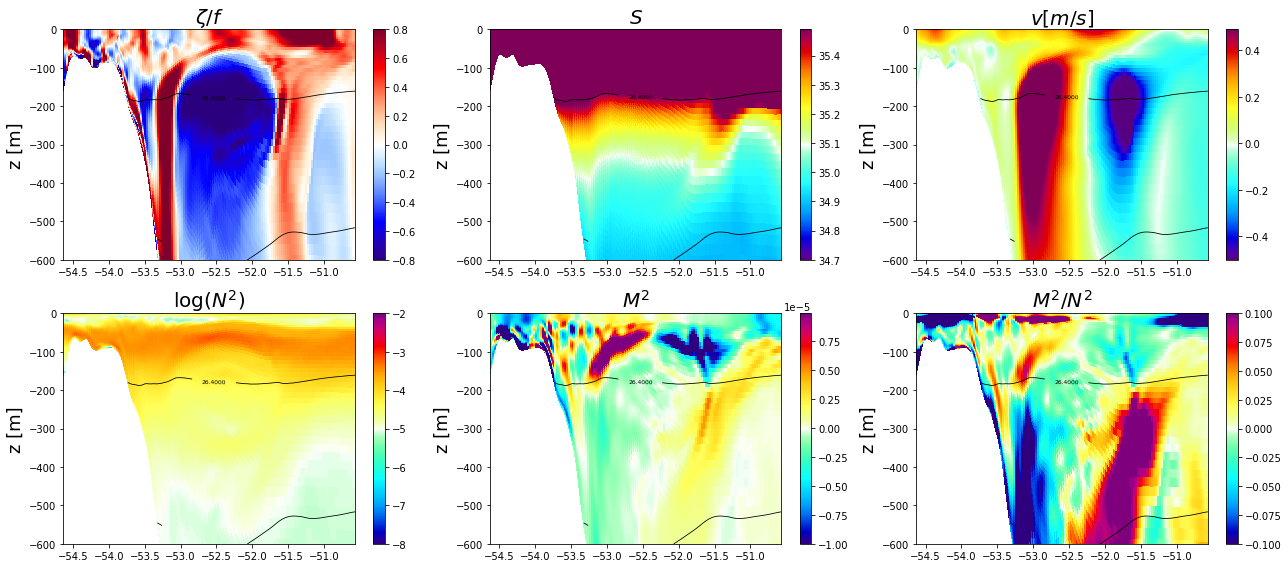

In [26]:

time0 = simul.time

############

for iy in y_sections:

  for time in [time0]: #range(time0,time+40):
    
    ############

    domain = 'iy' + format(iy)

    #########

    dy = 5
    
    simul_vert = load(simul = simulname + ' [' + format(iy-dy) + ',' + format(iy+dy)\
                                   +  ',900,1050,[1,300,1]] ' + format(time), output = False);

    
    #################################################
    #Compute vertical coordinates
    #################################################

    [z_r,z_w] = tools.get_depths(simul_vert)

    # define z
    #[_,_,z] =np.mgrid[0:z_r.shape[0],0:z_r.shape[1],0:z_r.shape[2]]
    
    
    #################################################
    # Compute variables 
    
    vrt = (var('vrt',simul_vert).data.T / tools.rho2psi(simul_vert.f).T ).T

    rho = var('rho1',simul_vert).data + simul_vert.rho0 - 1000.

    salt = var('salt',simul_vert).data
         
    bvf = tools.w2rho(var('bvf',simul_vert).data)
    
    dbdx = tools.u2rho(tools.diffxi(rho, simul_vert.pm, z_r, z_w))

    v = var('v',simul_vert).data


    # Define horizontal coordinates (deg, km, or grid points)
    ##############

    coord = 'deg'

    if coord=='deg':
        #using lon,lat
        lon_vert = simul_vert.x; lat = simul_vert.y
        xlabel = 'lon'; ylabel = 'lat'
    elif coord=='km':
        # using km
        [lon_vert,lat_vert] = np.meshgrid(np.arange(simul_vert.x.shape[0])+simul_vert.coord[2],np.arange(simul_vert.x.shape[1])+simul_vert.coord[0])
        lon_vert = (lon_vert/np.mean(simul_vert.pm)*1e-3).T
        lat_vert = (lat_vert/np.mean(simul_vert.pn)*1e-3).T
        xlabel = 'km'; ylabel = 'km'
    elif coord=='points':
        # using grid points
        [lon_vert,lat_vert] = np.meshgrid(np.arange(simul_vert.x.shape[0])+simul_vert.coord[2],np.arange(simul_vert.x.shape[1])+simul_vert.coord[0])
        lon_vert,lat_vert = lon_vert.T,lat_vert.T
        xlabel = 'grid pts'; ylabel = 'grid pts'


    # define lon in 3d
    lat3d = copy(z_r)
    for iz in range(lat3d.shape[2]):
        lat3d[:,:,iz] = lon_vert

    #################################################
    # Plot  data
    #################################################
    levels = np.arange(-1.,1.01,0.01)*0.8
    my_cmap=plot.ncview_colormap('blu_red')

    #################################################
    # Plot  data
    #################################################

    fig = plt.figure(figsize=(18.0,8.0))
    fig.set_tight_layout(1.)

    ###################

    ax1 = plt.subplot(2,3,1);
    plt.pcolormesh(tools.rho2psi(lat3d)[:,dy,:], tools.rho2psi(z_r)[:,dy,:],
                    vrt[:,dy,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap,shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    sigs = np.array([26.4, 27.2, 27.4, 27.6, 27.8, 27.88]) # for plotting isopycnals

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$\zeta/f$', fontsize=20)
    
    
    imin = np.min(np.where(z_w[:,dy,0]<-20))
    imax = np.max(np.where(z_w[:,dy,0]<-20))
    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])

    #################################################
    # 
    #################################################

    levels = np.arange(34.7,35.5,0.01)
    my_cmap=plot.ncview_colormap('jaisnc')

    ###################

    ax1 = plt.subplot(2,3,2);
    plt.pcolormesh(lat3d[:,dy,:], z_r[:,dy,:],
                    salt[:,dy,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$S$', fontsize=20)

    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])
    
    
    #################################################
    # 
    #################################################

    levels = np.arange(0.,1.,0.01)*1e-4
    my_cmap=plot.ncview_colormap('jaisnd')

    ###################

    ax1 = plt.subplot(2,3,4);
    plt.pcolormesh(lat3d[:,dy,:], z_r[:,dy,:],
                    np.log10(np.abs(bvf[:,dy,:])), vmin=-8, vmax=-2 , cmap = my_cmap, shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'log($N^2$)', fontsize=20)
    

    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])
    
    
    #################################################
    # 
    #################################################

    levels = np.arange(-0.5,0.5,0.01)
    my_cmap=plot.ncview_colormap('jaisnc')

    ###################

    ax1 = plt.subplot(2,3,3);
    plt.pcolormesh(tools.rho2v(lat3d)[:,dy,:], tools.rho2v(z_r)[:,dy,:],
                    v[:,dy,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$v [m/s]$', fontsize=20)
    
    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])
    ###################

        
    #################################################
    # 
    #################################################

    levels = np.arange(-1.,1.,0.01)*1e-5
    my_cmap=plot.ncview_colormap('jaisnd')

    ###################

    ax1 = plt.subplot(2,3,5);
    plt.pcolormesh(lat3d[:,dy,:], z_r[:,dy,:],
                    dbdx[:,dy,:], vmin=levels.min(), vmax=levels.max() , cmap = my_cmap, shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$M^2$', fontsize=20)
    
    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])
    ###################
    
    #################################################
    # 
    #################################################

    my_cmap=plot.ncview_colormap('jaisnd')

    ###################

    ax1 = plt.subplot(2,3,6);
    plt.pcolormesh(lat3d[:,dy,:], z_r[:,dy,:],
                    dbdx[:,dy,:]/bvf[:,dy,:], vmin=-.1, vmax=.1 , cmap = my_cmap, shading='auto'); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],np.max(z) - z[:,dy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,dy,:],z_r[:,dy,:],rho[:,dy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$M^2/N^2$', fontsize=20)
    

    plt.xlim([lon_vert[imin,dy],lon_vert[imax,dy]]); plt.ylim([-600,0])
    
    ###################
    plt.savefig('eurec4a_vertical_section_' + domain + '_' + '{0:04}'.format(time) +  '.png', bbox_inches='tight', transparent='true', dpi=150)
    #plt.clf()
    

In [27]:


######

def create_file(filename, x, z, N2, M2, zeta, density, Ro, Ri, f):
    
    
        nx = x.shape[0]
        nz = x.shape[1]
        
        ###################################################################################
        # save netcdf file
        ###################################################################################

        nc = Dataset(filename,'w',format='NETCDF4')
        # --- create global attributes ------------------------------------------
        nc.title        = 'section from GIGATL3'

        nc.createDimension('x',nx)
        nc.createDimension('s_rho',nz)
        
        netvar             = nc.createVariable('x','d',('x','s_rho',))
        netvar.long_name   = 'grid points'
        nc.variables['x'][:] = x
        
        netvar             = nc.createVariable('s_rho','d',('x','s_rho',))
        netvar.long_name   = 's_rho'
        nc.variables['s_rho'][:] = z
        
        netvar             = nc.createVariable('z','d',('x','s_rho',))
        netvar.long_name   = 'depth'
        nc.variables['z'][:] = z
        
        netvar             = nc.createVariable('N2','d',('x','s_rho',))
        netvar.long_name   = 'N2'

        netvar             = nc.createVariable('M2','d',('x','s_rho',))
        netvar.long_name   = 'M2'
        
        netvar             = nc.createVariable('zeta','d',('x','s_rho',))
        netvar.long_name   = 'relative vorticity'        

        netvar             = nc.createVariable('rho','d',('x','s_rho',))
        netvar.long_name   = 'potential density (rho1)'
        netvar.units       = 'kg/m3'
        
        netvar             = nc.createVariable('Ro','d',('x','s_rho',))
        netvar.long_name   = 'Ro'

        netvar             = nc.createVariable('Ri','d',('x','s_rho',))
        netvar.long_name   = 'Ri'

        netvar             = nc.createVariable('f','d',('x',))
        netvar.long_name   = 'Coriolis parameter'
        
        nc.close()

        #################

        nc = Dataset(filename,'a',format='NETCDF4')

        nc.variables['N2'][:,:] = N2
        nc.variables['M2'][:,:] = M2
        nc.variables['zeta'][:,:] = zeta
        nc.variables['rho'][:,:] = density
        nc.variables['Ro'][:,:] = Ro
        nc.variables['Ri'][:,:] = Ri
        nc.variables['f'][:] = f
        
        nc.close()

#################


x_sec   = np.mean(lat3d[:,1:-1,:],axis=1)
z_sec   = np.mean(z_r[:,1:-1,:],axis=1)
vrt_sec = np.mean(tools.psi2rho(vrt)[:,1:-1,:],axis=1)
rho_sec = np.mean(rho[:,1:-1,:] + 1000.,axis=1)
N2_sec  = np.mean(bvf[:,1:-1,:],axis=1)
M2_sec  = np.mean(dbdx[:,1:-1,:],axis=1)

f_sec   = np.mean(simul_vert.f[:,1:-1],axis=1)
Ro_sec = (vrt_sec.T / f_sec.T ).T
Ri_sec = (N2_sec.T * f_sec.T**2 /(M2_sec.T**2) ).T

#################

create_file('section.nc', x_sec, z_sec, N2_sec, M2_sec, vrt_sec, rho_sec, Ro_sec, Ri_sec, f_sec)


In [21]:
N2_sec.shape

(250, 100)